In [1]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr

import plot_tracer as pltr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load mitgcm output where \kappa_{redi}=50
datadir='tracer/time_50'
iters=range(38550000,38600000,150000)
prefixes=['tracer1','tracer2','layersDiags']
dslayers=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid = xgcm.Grid(dslayers, periodic=['X'])
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [dslayers[name] for name in names]
all_tracers50 = xr.concat(all_tracer_list, dim='tracer')


In [3]:
#load mitgcm output where \kappa_{redi}=500
datadir='tracer/time_500'
iters=range(38550000,38600000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracers500 = xr.concat(all_tracer_list, dim='tracer')


In [4]:
datadir='tracer/time_5000'
iters=range(38550000,38600000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracers5000 = xr.concat(all_tracer_list, dim='tracer')


In [5]:
datadir='tracer/time_kv3'
iters=range(38550000,38600000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracerskv3 = xr.concat(all_tracer_list, dim='tracer')

In [6]:
datadir='tracer/time_kv4'
iters=range(38550000,38600000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracerskv4 = xr.concat(all_tracer_list, dim='tracer')

In [7]:
datadir='tracer/time_kv5'
iters=range(38550000,38600000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracerskv5 = xr.concat(all_tracer_list, dim='tracer')

In [8]:
all_tracer=xr.concat([all_tracers50, all_tracers500, all_tracers5000,all_tracerskv5,all_tracerskv4,all_tracerskv3],'case')
deepPac= ((all_tracer.mean('time') * ds.drF *ds.rA).isel(tracer=slice(0,10)).where(ds.XC<140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z'])/((ds.drF *ds.rA.where(ds.XC<140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z']))
deepPac['tracer']=["Atl North","Pac North","Atl Low Lat","Pac Low Lat","Atl South","Pac South","Channel Atl","Channel Pac","Channel Atl S","Channel Pac S"]
deepPac['case']=['50','500','5000','kva5','kvb4','kvc3']
deepPacAge=((all_tracer.mean('time') * ds.drF *ds.rA).isel(tracer=10).where(ds.XC<140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z'])/((ds.drF *ds.rA.where(ds.XC<140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z']))
deepPacAge['case']=['50','500','5000','kv5','kv4','kv3']
seriesPac = deepPac.to_series()
seriesPac

case  tracer       
50    Atl North        0.687011
      Pac North        0.102761
      Atl Low Lat      0.000859
      Pac Low Lat      0.006560
      Atl South        0.000510
      Pac South        0.001201
      Channel Atl      0.000491
      Channel Pac      0.000430
      Channel Atl S    0.094736
      Channel Pac S    0.095847
500   Atl North        0.631410
      Pac North        0.100027
      Atl Low Lat      0.001136
      Pac Low Lat      0.006395
      Atl South        0.000723
      Pac South        0.001521
      Channel Atl      0.000645
      Channel Pac      0.000598
      Channel Atl S    0.100986
      Channel Pac S    0.145457
5000  Atl North        0.402344
      Pac North        0.113280
      Atl Low Lat      0.000003
      Pac Low Lat      0.002389
      Atl South        0.000644
      Pac South        0.000069
      Channel Atl      0.002448
      Channel Pac     -0.002482
      Channel Atl S    0.160744
      Channel Pac S    0.306810
kva5  Atl North     

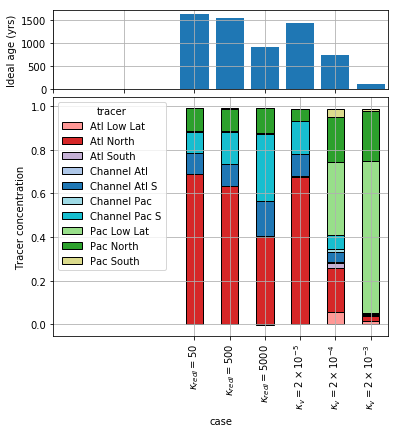

In [9]:
fig, (ax1, ax2)  = plt.subplots(2,1,figsize=(6,6), gridspec_kw = {'height_ratios':[1, 3]})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
ax1.bar(np.arange(0,6),deepPacAge.values/24/365/3600)
ax1.set_xlim(-4, 5.5)
ax1.set_yticks(np.arange(0,2000,500))
ax1.grid(True)
ax1.set_ylabel('Ideal age (yrs)')
ax1.set_xticklabels((r'', r'', r'', r' ', r'',r''))
#plt.xticks(rotation=90)

series2Pac=seriesPac.reset_index(name='tracerint').groupby(['tracer','case'])['tracerint'].sum().unstack('tracer').fillna(0)
#series2
cmap = plt.cm.get_cmap('tab20')
series2Pac.plot(kind='bar',ax=ax2,stacked='True', edgecolor='black',color=[cmap(7),cmap(6),cmap(9),cmap(1),cmap(0),cmap(19),cmap(18),cmap(5),cmap(4),cmap(17)])
plt.grid(True)
plt.xlim(-4, 5.5)
ax2.set_ylabel('Tracer concentration')
ax2.set_xticklabels((r'$\kappa_{redi}=50$', r'$\kappa_{redi}=500$', r'$\kappa_{redi}=5000$', r' $\kappa_v=2 \times10^{-5}$', r'$ \kappa_v=2 \times10^{-4}$',r'$\kappa_v=2 \times10^{-3}$'))
fig = plt.gcf()
fig.savefig('../tracer_figs/barchart_deepNP.eps', bbox_inches='tight')

In [10]:
#barchart for north Atlantic
all_tracer=xr.concat([all_tracers50, all_tracers500, all_tracers5000,all_tracerskv5,all_tracerskv4,all_tracerskv3],'case')
deepAtl= ((all_tracer.mean('time') * ds.drF *ds.rA).isel(tracer=slice(0,10)).where(ds.XC>140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z'])/((ds.drF *ds.rA.where(ds.XC>140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z']))
deepAtl['tracer']=["Atl North","Pac North","Atl Low Lat","Pac Low Lat","Atl South","Pac South","Channel Atl","Channel Pac","Channel Atl S","Channel Pac S"]
deepAtl['case']=['50','500','5000','kva5','kvb4','kvc3']
deepAtlAge=((all_tracer.mean('time') * ds.drF *ds.rA).isel(tracer=10).where(ds.XC>140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z'])/((ds.drF *ds.rA.where(ds.XC>140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z']))
deepAtlAge['case']=['50','500','5000','kv5','kv4','kv3']
seriesAtl = deepAtl.to_series()
seriesAtl

case  tracer       
50    Atl North        0.968609
      Pac North        0.001453
      Atl Low Lat      0.000243
      Pac Low Lat      0.000224
      Atl South        0.000072
      Pac South        0.000130
      Channel Atl      0.000023
      Channel Pac      0.000019
      Channel Atl S    0.004660
      Channel Pac S    0.004514
500   Atl North        0.963133
      Pac North        0.001728
      Atl Low Lat      0.000252
      Pac Low Lat      0.000207
      Atl South        0.000075
      Pac South        0.000104
      Channel Atl      0.000036
      Channel Pac      0.000037
      Channel Atl S    0.005851
      Channel Pac S    0.008502
5000  Atl North        0.881128
      Pac North        0.009841
      Atl Low Lat     -0.000008
      Pac Low Lat      0.000462
      Atl South        0.000491
      Pac South        0.000142
      Channel Atl      0.000622
      Channel Pac     -0.000164
      Channel Atl S    0.028795
      Channel Pac S    0.058523
kva5  Atl North     

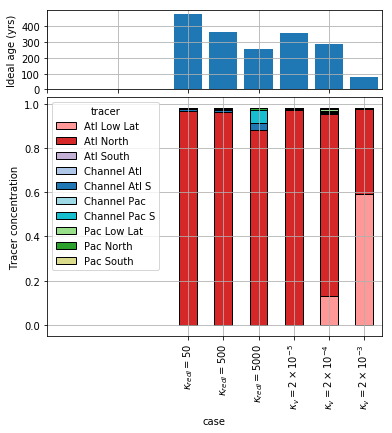

In [11]:
fig, (ax1, ax2)  = plt.subplots(2,1,figsize=(6,6), gridspec_kw = {'height_ratios':[1, 3]})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
ax1.bar(np.arange(0,6),deepAtlAge.values/24/365/3600)
ax1.set_xlim(-4, 5.5)
ax1.set_yticks(np.arange(0,500,100))
ax1.grid(True)
ax1.set_ylabel('Ideal age (yrs)')
ax1.set_xticklabels((r'', r'', r'', r' ', r'',r''))
#plt.xticks(rotation=90)

series2Atl=seriesAtl.reset_index(name='tracerint').groupby(['tracer','case'])['tracerint'].sum().unstack('tracer').fillna(0)
#series2
cmap = plt.cm.get_cmap('tab20')
series2Atl.plot(kind='bar',ax=ax2,stacked='True', edgecolor='black',color=[cmap(7),cmap(6),cmap(9),cmap(1),cmap(0),cmap(19),cmap(18),cmap(5),cmap(4),cmap(17)])
plt.grid(True)
plt.xlim(-4, 5.5)
ax2.set_ylabel('Tracer concentration')
ax2.set_xticklabels((r'$\kappa_{redi}=50$', r'$\kappa_{redi}=500$', r'$\kappa_{redi}=5000$', r' $\kappa_v=2 \times10^{-5}$', r'$ \kappa_v=2 \times10^{-4}$',r'$\kappa_v=2 \times10^{-3}$'))
fig = plt.gcf()
fig.savefig('../tracer_figs/barchart_deepNA.eps', bbox_inches='tight')

In [12]:
trac=xr.concat([all_tracers50,all_tracers500,all_tracers5000,all_tracerskv5,all_tracerskv4,all_tracerskv3],dim='case')
all_tracers_mean_pac,all_tracers_mean_atl,layers_depth_atl,layers_depth_pac,layers_depth,ROC_pac,ROC_atl,ROC_tot,tracerb=pltr.fields_for_plotting(dslayers,trac,grid)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)


In [13]:
p=pltr.plot_tracers3(dsl,all_tracers_mean_pac,layers_depth_pac,layers_depth,ROC_pac,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Wide_NADW.eps', bbox_inches='tight')

AttributeError: 'Dataset' object has no attribute 'layer_1RHO_bounds'

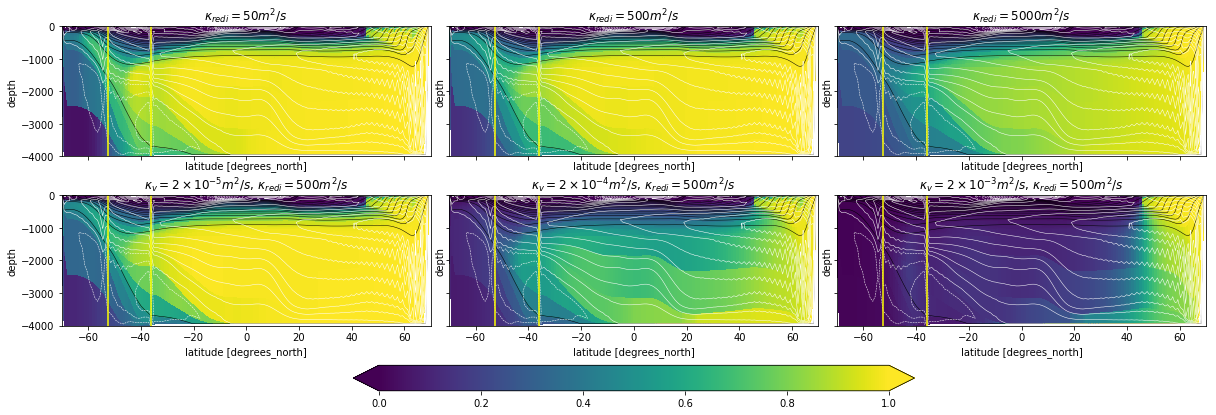

In [11]:
p=pltr.plot_tracers3(ds,all_tracers_mean_atl,layers_depth_atl,layers_depth,ROC_atl,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Narrow_NADW.eps', bbox_inches='tight')

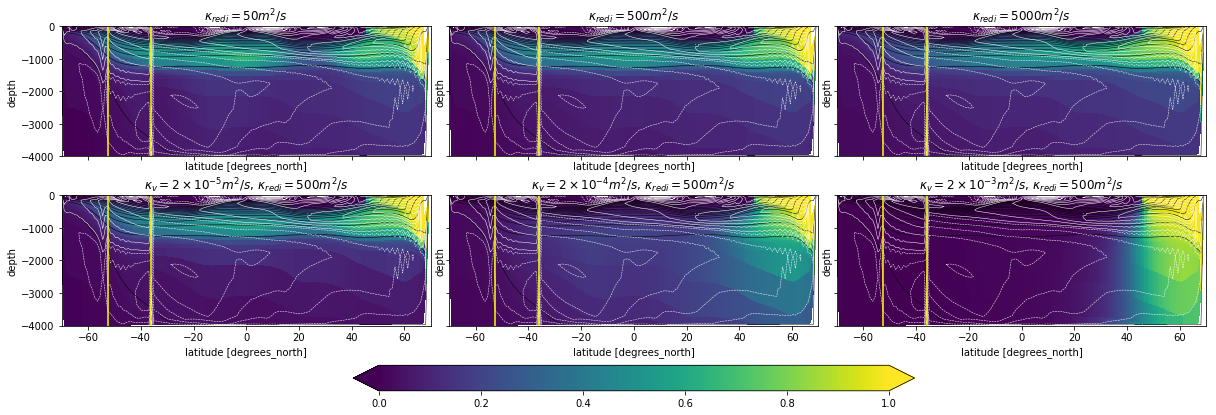

In [12]:
p=pltr.plot_tracerspac(ds,all_tracers_mean_pac,layers_depth_pac,layers_depth,ROC_pac,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Wide_NPDW.eps', bbox_inches='tight')

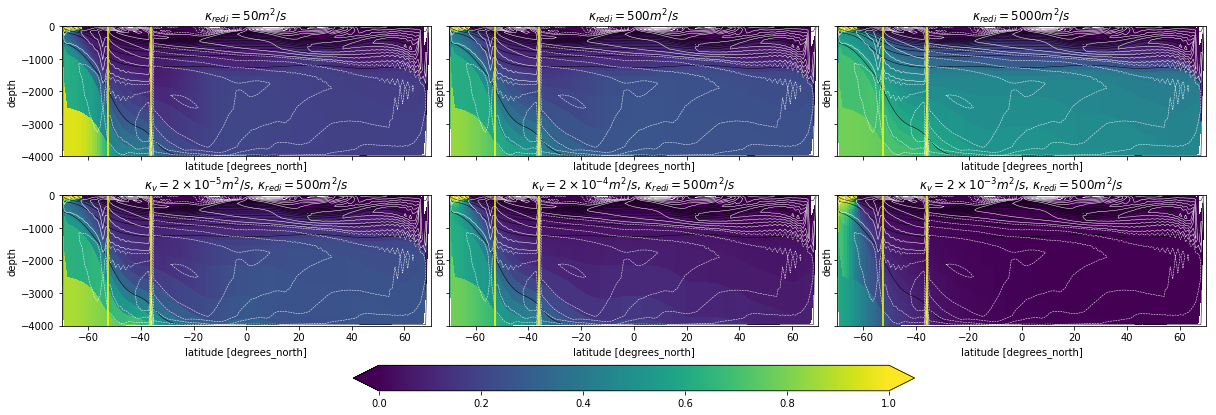

In [10]:
p=pltr.plot_tracerschannel(ds,all_tracers_mean_pac,layers_depth_pac,layers_depth,ROC_pac,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Wide_AABW.eps', bbox_inches='tight')

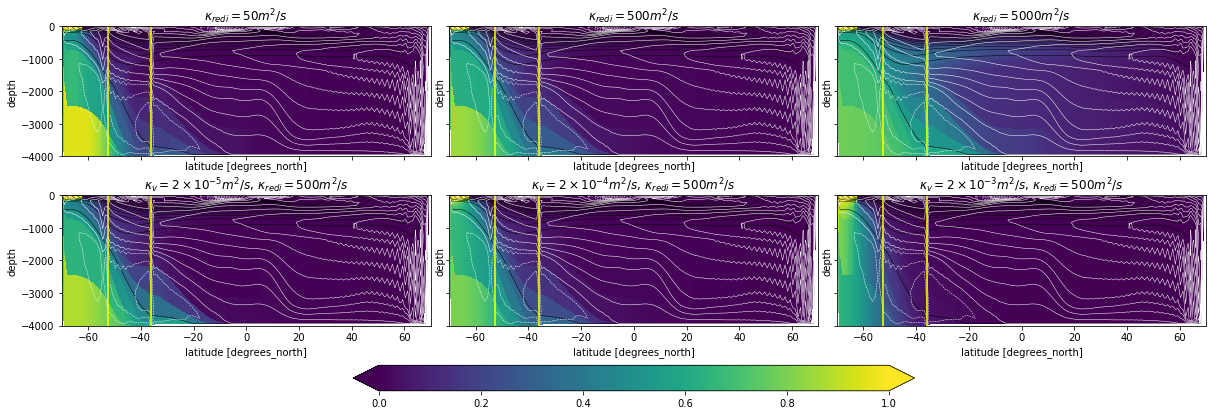

In [11]:
p=pltr.plot_tracerschannel(ds,all_tracers_mean_atl,layers_depth_atl,layers_depth,ROC_atl,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Narrow_AABW.eps', bbox_inches='tight')

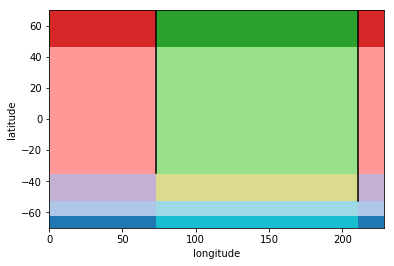

In [16]:
nx=216
ny=144
nz=32
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerAA.bin'
ds1=np.fromfile(fname,dtype='>f')
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerAP.bin'
ds2=np.fromfile(fname,dtype='>f')
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerBA.bin'
ds3=np.fromfile(fname,dtype='>f')
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerBP.bin'
ds4=np.fromfile(fname,dtype='>f')
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerMA.bin'
ds5=np.fromfile(fname,dtype='>f')
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerMP.bin'
ds6=np.fromfile(fname,dtype='>f')
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerNA.bin'
ds7=np.fromfile(fname,dtype='>f')
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerNP.bin'
ds8=np.fromfile(fname,dtype='>f')
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerTA.bin'
ds9=np.fromfile(fname,dtype='>f')
fname='/swot/SUM01/spencer/tracer_redi5000tr/tracerTP.bin'
ds10=np.fromfile(fname,dtype='>f')
ds=ds1*0.01+ds2*0.94+ds6+ds5*0.1+ds3*0.46+ds9*0.38+ds7*0.33+ds4*0.88+ds10*0.28+ds8*0.23
ds[ds==0]=np.nan
land=np.reshape(ds,(nz,ny,nx))
land=np.transpose(land,(1,2,0))
indices=list(np.arange(140,215))+list(np.arange(0,140))+list(np.arange(140,160))
ax=plt.pcolor(np.linspace(0,210+0.97*19,235),np.linspace(-70,70,144),land[:,indices,1],cmap='tab20',rasterized=True)
#plt.colorbar(ax)
plt.plot((73,73), (-35, 70), 'k-')
plt.plot((211,211), (-52.5, 70), 'k-')
plt.xlabel('longitude')
plt.ylabel('latitude')
land[10,10,1]
fig = plt.gcf()
fig.savefig('../10boxes.eps', bbox_inches='tight')